# Qunatum optimal control example

This is an example code for qunatum optimal control. you can choose any Hamiltonian you want but with only one control parameter. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from qoct_gen import QH, QOCT
%matplotlib inline

Start with some initial conditions of Hamiltonian matrix and an initial control parameter.

In [31]:
H0 = [[1.,0.],[0.,-1.]]
Hctr = [[0,1.],[1.,0]]
Hctr2 = [[0,-1j],[1j,0]]
ctrl_i = .9*np.ones(1000)
ctrl_j = .1*np.ones(1000)
phi_i = [[0],[1.]]

Call QH module to build up equation of motion and states.

In [36]:
qh_test = QH(H0, [Hctr,Hctr2], [ctrl_i,ctrl_j], phi_i)
time = qh_test.real_tim
phi = qh_test.phi_t()

Here we can show our first figure of probability variation in time.

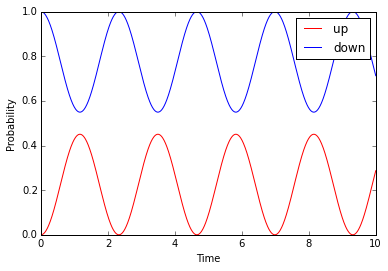

In [37]:
prob = qh_test.prob_t(phi)
plt.plot(time, prob[:,0,:],'r',label = 'up')
plt.plot(time, prob[:,1,:],'b',label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

You can find the probability will stay at original state since I choose eigenstate to begin, and with a small variation cause by ctrl_i. 

Given the goal state we want and previous qh_test class into QOCT module to calculate optimal control pulse.

In [38]:
phi_g = [[1],[0]]
qoct_test = QOCT(qh_test, phi_g)
ctrl_test = qoct_test.run()


IterTime: 1,   Error: 0.464197781816,   TotTime: 1.833877,   AvgTime: 1.833882
IterTime: 2,   Error: 0.259593865415,   TotTime: 3.583347,   AvgTime: 1.791675
IterTime: 3,   Error: 0.138564876396,   TotTime: 5.421983,   AvgTime: 1.807329
IterTime: 4,   Error: 0.0726205152434,   TotTime: 7.429163,   AvgTime: 1.85729175
IterTime: 5,   Error: 0.0379842959424,   TotTime: 9.812626,   AvgTime: 1.9625262
IterTime: 6,   Error: 0.0199978508264,   TotTime: 12.192629,   AvgTime: 2.0321055
IterTime: 7,   Error: 0.0106400164902,   TotTime: 14.55967,   AvgTime: 2.07995342857
IterTime: 8,   Error: 0.00572997816743,   TotTime: 16.934979,   AvgTime: 2.116872875
IterTime: 9,   Error: 0.00312388724668,   TotTime: 19.303895,   AvgTime: 2.14487766667
IterTime: 10,   Error: 0.00172313876475,   TotTime: 21.676194,   AvgTime: 2.1676199
IterTime: 11,   Error: 0.000960727532859,   TotTime: 24.037961,   AvgTime: 2.18526963636
IterTime: 12,   Error: 0.000540782572098,   TotTime: 26.412585,   AvgTime: 2.20104916667

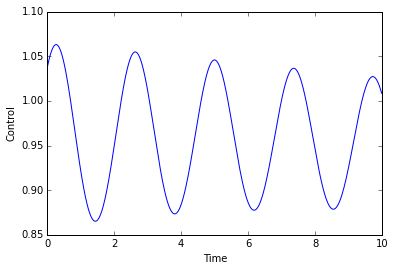

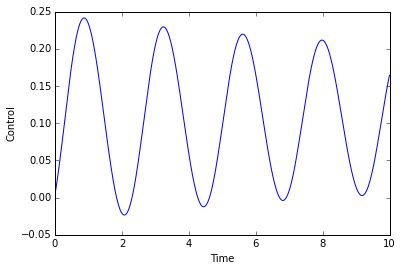

In [39]:
for i in range(len(ctrl_test[:,0])):
    plt.plot(time[:-1], ctrl_test[i,:])
    plt.xlabel('Time')
    plt.ylabel('Control')
    plt.show()

and probability variation in time.

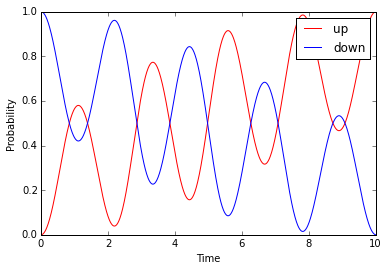

In [40]:
phi_new = qh_test.phi_t()
prob_new = qh_test.prob_t(phi_new)

plt.plot(time, prob_new[:,0,:],'r',label = 'up')
plt.plot(time, prob_new[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

Following we consider a long time variation of probability and control comes in the middle time.

In [41]:
lon = np.shape(ctrl_test)[1]
num_c = np.shape(ctrl_test)[0]
ctrl_lon = np.zeros((num_c,3*lon))
ctrl_lon[:,lon:2*lon] = ctrl_test[:,:]

One can plot the probability variation again.

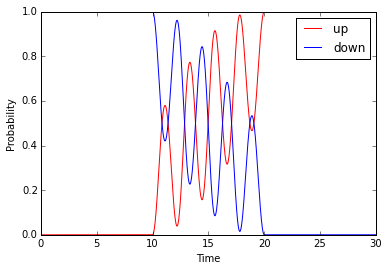

In [43]:
qh_test2 = QH(H0, [Hctr,Hctr2], [ctrl_lon[0],ctrl_lon[1]], phi_i)
time2 = qh_test2.real_tim
phi2 = qh_test2.phi_t()

prob2 = qh_test2.prob_t(phi2)
plt.plot(time2, prob2[:,0,:],'r',label = 'up')
plt.plot(time2, prob2[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

The end.